In [1]:
import os, sys
import datetime
from datetime import datetime, date, timedelta
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas_profiling import ProfileReport
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy import sparse
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import pingouin as pg
import spacy, nltk
from konlpy.tag import Okt

c:\Users\admin\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as smfa

In [3]:
cats = pd.read_csv('data_ba/cats.csv')
cats.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


In [4]:
pd.concat([cats.dtypes, cats.nunique()], axis=1), cats.shape

(           0   1
 Sex   object   2
 Bwt  float64  20
 Hwt  float64  73,
 (144, 3))

In [5]:
# 귀무가설: 정규성을 가진다 / 대립가설: 정규성을 가지지 않는다
ss.shapiro(cats['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

In [6]:
mu = 2.6
ss.wilcoxon(cats['Bwt'] - mu, alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

In [7]:
ss.ttest_1samp(cats['Bwt'], popmean=mu, alternative='two-sided')

Ttest_1sampResult(statistic=3.0564867998078107, pvalue=0.0026730362561723613)

<AxesSubplot:ylabel='Frequency'>

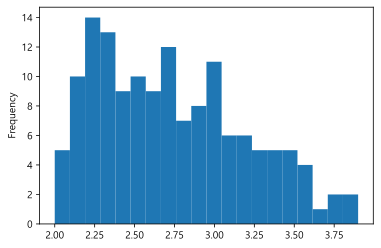

In [8]:
cats['Bwt'].plot.hist(bins=20)

In [9]:
data = {'before':[7,3,4,5,2,1,6,6,5,4],
       'after':[8,4,5,6,2,3,6,8,6,5]}
data = pd.DataFrame(data)
data.head()

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2


In [10]:
ss.ttest_rel(data['after'], data['before'], alternative='two-sided')

Ttest_relResult(statistic=4.743416490252569, pvalue=0.0010538712570165528)

In [11]:
cats.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


In [12]:
female = cats.loc[cats['Sex'] == 'F', 'Bwt']
male = cats.loc[cats['Sex'] == 'M', 'Bwt']
female.shape, male.shape

((47,), (97,))

In [13]:
# 귀무가설: 등분산성을 만족한다 / 대립가설: 등분산성을 만족하지 않는다
ss.levene(female, male)

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [14]:
ss.ttest_ind(female, male, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

In [15]:
iris = pd.read_csv('data_ba/iris.csv')
iris.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
target_list = iris['target'].unique()
setosa = iris.loc[iris['target'] == target_list[0], 'sepal width']
versicolor = iris.loc[iris['target'] == target_list[1], 'sepal width']
virginica = iris.loc[iris['target'] == target_list[2], 'sepal width']

<AxesSubplot:xlabel='target', ylabel='sepal width'>

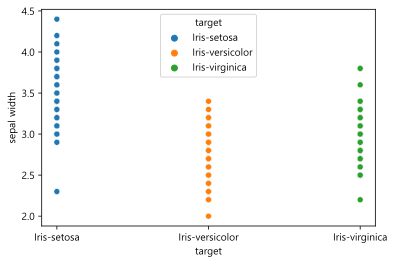

In [17]:
sns.scatterplot(data=iris, x='target', y='sepal width', hue='target')

In [18]:
# 정규성 검정 → 정규성 만족
ss.shapiro(setosa), ss.shapiro(versicolor), ss.shapiro(virginica)

(ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427),
 ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507),
 ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896))

In [19]:
# 등분산성 검정 → 등분산성 만족
ss.levene(setosa, versicolor, virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

In [20]:
ss.f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.0428,0.3652,True


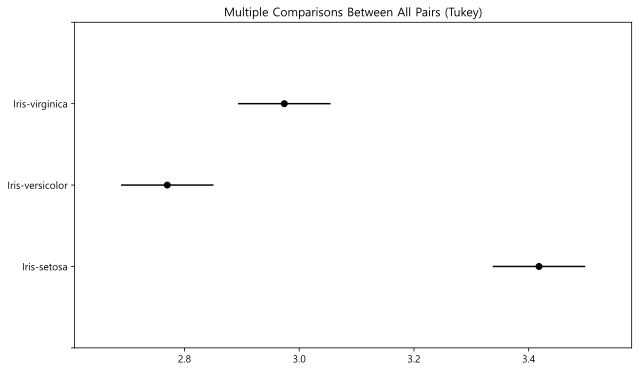

In [21]:
mc = MultiComparison(data=iris['sepal width'], groups=iris['target'])
tukeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tukeyhsd.plot_simultaneous()
# diff는 오른쪽 집단 - 왼쪽 집단
tukeyhsd.summary()

In [22]:
# 정규성을 만족하지 못했을 경우
ss.kruskal(setosa, versicolor, virginica)

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

In [23]:
# 등분산성을 만족하지 못했을 경우
pg.welch_anova(data=iris, dv='sepal width', between='target')

,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,97.369597,43.303381,3.519723e-14,0.391881


In [24]:
mtcars = pd.read_csv('data_ba/mtcars.csv')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [25]:
# 각 범주형 변수 및 교호작용이 종속변수에 영향을 미치는지 → 교호작용이 존재하지 않아야(귀무가설이 맞아야)
formula = 'mpg ~ C(cyl) + C(am) + C(cyl):C(am)'
model = smfa.ols(formula, mtcars).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(cyl),456.400921,2.0,24.819011,9.354735e-07
C(am),36.766919,1.0,3.998759,5.608373e-02
C(cyl):C(am),25.436511,2.0,1.383233,2.686140e-01
Residual,239.059167,26.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
4,6,-6.9208,0.0003,-10.7693,-3.0722,True
4,8,-11.5636,0.0,-14.7708,-8.3565,True
6,8,-4.6429,0.0112,-8.3276,-0.9581,True


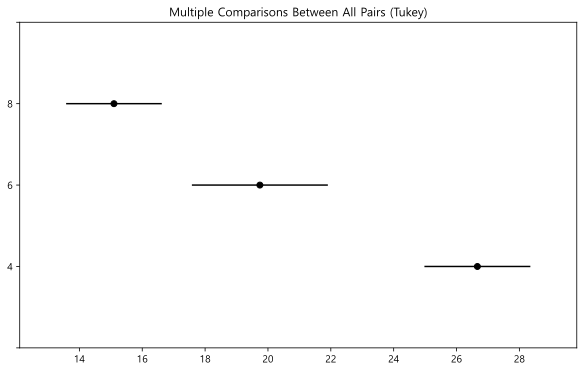

In [26]:
mc = MultiComparison(data=mtcars['mpg'], groups=mtcars['cyl'])
tukeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tukeyhsd.plot_simultaneous()
tukeyhsd.summary()

In [27]:
tit_df = pd.read_csv('data_ba/titanic.csv')
tit_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton


In [28]:
pd.concat([tit_df.dtypes, tit_df.nunique()], axis=1)

,0,1
survived,int64,2
pclass,int64,3
sex,object,2
age,float64,88
sibsp,int64,7
parch,int64,7
fare,float64,248
embarked,object,3
class,object,3
adult_male,bool,2


In [44]:
sex = ['female', 'male']
exp = (tit_df.loc[:, 'sex'].value_counts(normalize=True, sort=False).reindex(sex) * tit_df.loc[tit_df['survived'] == 1, :].shape[0]).round(0)

In [45]:
obs = tit_df.loc[tit_df['survived'] == 1, 'sex'].value_counts(sort=False).reindex(sex)

In [46]:
# 적합도(goodness of fit) 검정 → 카이제곱 값이 너무 높아서 p-value가 안나오는듯
ss.chisquare(obs, exp, ddof=tit_df.shape[0] - 1)

Power_divergenceResult(statistic=160.4296024830784, pvalue=nan)

In [47]:
table = pd.crosstab(tit_df['class'], tit_df['survived'])
table

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


In [48]:
# 독립성(동질성) 검정
chi2, p_value, ddof, exp = ss.chi2_contingency(table)
chi2, p_value, ddof, exp

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

In [51]:
house_df = pd.read_csv('data_ba/kc_house_data.csv')
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,standard,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,standard,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,standard,0,3,6,770,0,1933,0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,standard,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,standard,0,3,8,1680,0,1987,0,1800,7503


In [52]:
house = house_df.loc[:, ['price', 'sqft_living']]
house.corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


In [53]:
X = house.loc[:, ['sqft_living']]
y = house.loc[:, 'price']

In [57]:
formula = 'price ~ sqft_living'
model = smfa.ols(formula, house).fit()
# F통계량을 통해 회귀분석의 유의성 확인 → 귀무가설: 회귀 모형은 유의하지 않다
# t통계량을 통해 회귀계수의 유의성 확인 → 귀무가설: 회귀계수는 유의하지 않다
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:36:44   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
# 잔차의 등분산성을 확인 → 그냥 x축과 y축이 등분산인지 확인하면 알 수 있을듯
ss.levene(house['sqft_living'], house['price'])

LeveneResult(statistic=11279.767410741559, pvalue=0.0)

In [59]:
# seaborn을 활용한 residplot으로 시각적 확인
sns.residplot(data=house, x='sqft_living', y='price')

<AxesSubplot:xlabel='sqft_living', ylabel='price'>